# Ride Regularization

In [1]:
# Solving through linear Regreesion i.e without Ride Regularization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
data =load_diabetes()
X =data.data
y = data.target

In [3]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
lr  =LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [5]:
y_pred =lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.4399338661568968

In [6]:
from sklearn.metrics import mean_squared_error
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE 55.627840795469155


# Ridge Regression

In [7]:
# Now applying Ride Regression
from sklearn.linear_model import Ridge 
R = Ridge(alpha=0.0001) # alpha  = lamda both are same
 

In [8]:
R.fit(X_train,Y_train)


Ridge(alpha=0.0001)

In [9]:
y_predict_r = R.predict(X_test)

In [10]:

print("RMSE",np.sqrt(mean_squared_error(Y_test,y_predict_r)))

RMSE 55.622423168816574


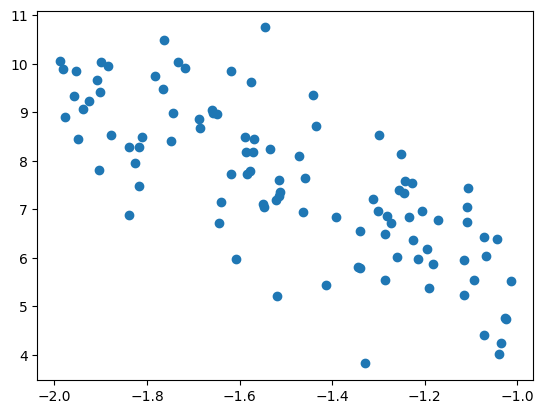

In [11]:
# random dataset
m =100
x1 =np.random.rand(m,1) -2
x2 =0.7*x1**2 -2*x1 + 3+ np.random.randn(m,1)

plt.scatter(x1, x2)
plt.show()

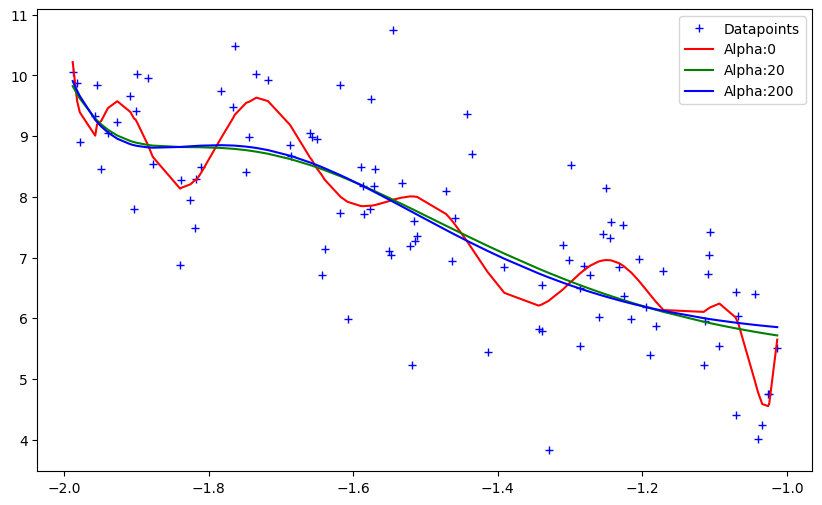

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model =Pipeline([('poly_feats',PolynomialFeatures(degree=16)),
                     ('ridge' ,Ridge(alpha=alpha))])
    
    model.fit(x1,x2)
    return model.predict(x1)

alphas =[0,20,200]
cs =['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label ='Datapoints')

for alpha ,c in zip(alphas,cs):
    preds =get_preds_ridge(x1,x2,alpha)
    
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],color =c, label ='Alpha:{}'.format(alpha))
plt.legend()
plt.show()
    

# Making ridge Regression using self class

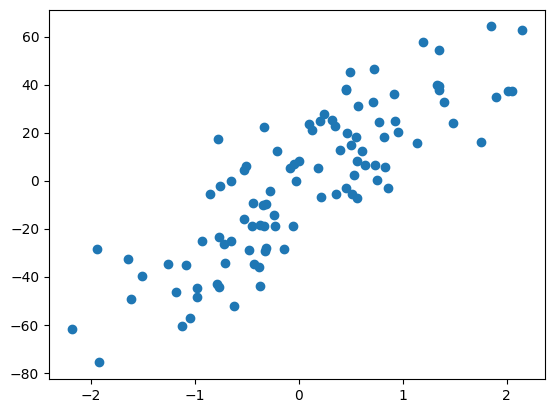

In [13]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)


In [14]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [15]:
R =Ridge(alpha=10)

R.fit(X,y)
print(R.coef_)
print(R.intercept_)


[24.9546267]
-2.1269130035235735


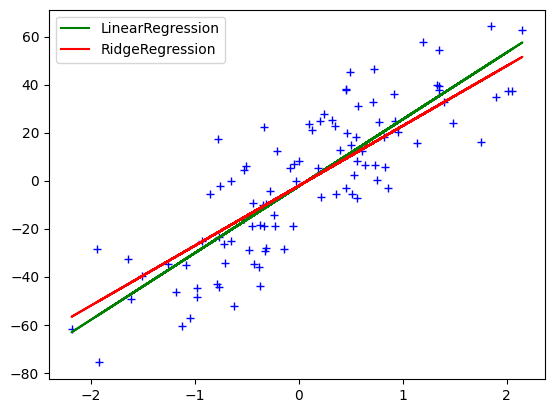

In [16]:

plt.plot(X,y ,'b+')
plt.plot(X,lr.predict(X),'g',label ='LinearRegression')
plt.plot(X,R.predict(X),'r',label ='RidgeRegression')
plt.legend()
plt.show()

In [17]:
# Making the class
class MeraRidge:
    def __init__(self,alpha =0.1):
        self.alpha =alpha
        self.intercept_ =None
        self.coef_ = None
    
    def fit(self,X,y):
        den =0
        num =0
        for i in range(X.shape[0]):
            num  =num + (y[i]-y.mean())*(X[i]-X.mean())
            den = den + (X[i]-X.mean())*(X[i]-X.mean())
        self.coef_ =num/ den + self.alpha
        self.intercept_ = (-2)*(y.mean() - self.coef_*(X.mean()) )
        
        return print("coef_",self.coef_),print("intercept",self.intercept_)
    
    def predict(self ,X):
        pass
    

In [18]:
ridge =MeraRidge(alpha=10)
ridge.fit(X,y)

coef_ [37.82809103]
intercept [5.75763694]


(None, None)

In [19]:
# for n dimensional
from sklearn.datasets import load_diabetes
data =load_diabetes(return_X_y=True)
X_train ,X_test,Y_train ,Y_test =train_test_split(X,y,test_size=0.2 ,random_state=4)

In [20]:
ridge = Ridge(alpha =0.1,solver='cholesky')
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1, solver='cholesky')

In [21]:
y_predict_rr= ridge.predict(X_test)
r2_score(Y_test,y_predict_rr)

0.6817951827681725

In [22]:
print(ridge.coef_)
print(ridge.intercept_)

[26.80612333]
-1.2588524583759875


In [23]:
class MeraRidge_n:
    def __init__(self,alpha):
        self.coef = None
        self.intercept =None
        self.alpha =alpha
        
    def fit(self,X_train,Y_train):
        X_train =np.insert(X_train,0,1,axis =1)
        I =np.identity(X_train.shape[1])
        result = np.linalg.inv(np.dot(X_train.T,X_train)+ self.alpha*I).dot(X_train.T).dot(Y_train)
        
        self.coef = result[0]
        self.intercept =result[1:]
        
        return print("coef",self.coef),print("intercept",self.intercept)
    
    def  predict(self,X_test):
        y_predicted = np.dot(X_test,self.coef) + self.intercept
        return y_predicted 
    
ridgefor_n = MeraRidge_n(alpha =0.1)
    
        
            
              
    

In [24]:
ridgefor_n.fit(X_train,Y_train)

coef -1.2572653260516922
intercept [26.80595589]


(None, None)

In [25]:
y_predc =ridgefor_n.predict(X_test)


# Ridge Using Gradient Descent

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_ridge = SGDRegressor ( penalty= 'l2',max_iter=500,eta0 =0.1,learning_rate='constant',alpha=0.001) # penalty = L2


In [27]:
# for n dimensional
from sklearn.datasets import load_diabetes
data =load_diabetes(return_X_y=True)
X_train ,X_test,Y_train ,Y_test =train_test_split(X,y,test_size=0.2 ,random_state=4)

In [28]:
sgd_ridge.fit(X_train,Y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [29]:
y_sgd_predict = sgd_ridge.predict(X_test)
r2_score(Y_test,y_sgd_predict)

0.6781456430887471

In [30]:
from sklearn.linear_model import Ridge
ridge_gd =Ridge(alpha =0.001,max_iter=500,solver='sparse_cg')

ridge_gd.fit(X_train,Y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [31]:
y_predict_ridge_gd =ridge_gd.predict(X_test)
r2_score(Y_test,y_predict_ridge_gd)

0.6820950688333278

In [32]:
class Meraridge_Gradient_Descent:
    def __init__(self,epochs,learning_rate,alpha):
        self.coef_ =None
        self.intercept_ =None
        self.epochs =epochs
        self.alpha =alpha
        self.learning_rate =learning_rate
        
    def fit(self,X_train,Y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ =0
        thetha = np.insert(self.coef_,0,self.intercept_) # matrix
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der =np.dot(X_train.T,X_train).dot(thetha) -np.dot(X_train.T,Y_train)- self.alpha*thetha
            thetha =thetha - self.learning_rate*thetha_der
            
        self.coef_ = thetha[1:]
        self.intercept_ =thetha[0]   
        return self.coef_ ,self.intercept_
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
    
    
ridddge  = Meraridge_Gradient_Descent(epochs=500,alpha=0.001,learning_rate=0.005)
ridddge.fit(X_train,Y_train) 
  

(array([26.84500484]), -1.2624792969345353)

In [33]:
ridddge.predict(X_test)

array([-22.44289349,  52.8361335 ,  48.39037899,  15.91520906,
       -29.32563342,  -6.82878295, -22.05823163, -31.34249168,
        -1.3266127 , -17.93268241,  10.86642512, -13.44346417,
        -9.71484587, -10.35268797,  -7.50195296,  34.44988495,
       -21.89627539, -15.30682518, -33.08505296,  12.19055381])

# 5 Key Points Visualization

In [34]:
from sklearn.datasets import load_diabetes
data =load_diabetes()
df =pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] =data.target
X_train ,X_test,Y_train ,Y_test =train_test_split(X,y,test_size=0.2 ,random_state=4)

POINT-1 :
As alpha increase the cofficent tends to Zero ,not exactly zero but tends to zero

In [35]:
coefs =[]
r2_scores =[]

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,Y_train)
    coefs.append(reg.coef_.tolist())
    c =reg.predict(X_test)
    r2_scores.append(r2_score(Y_test,c))
    

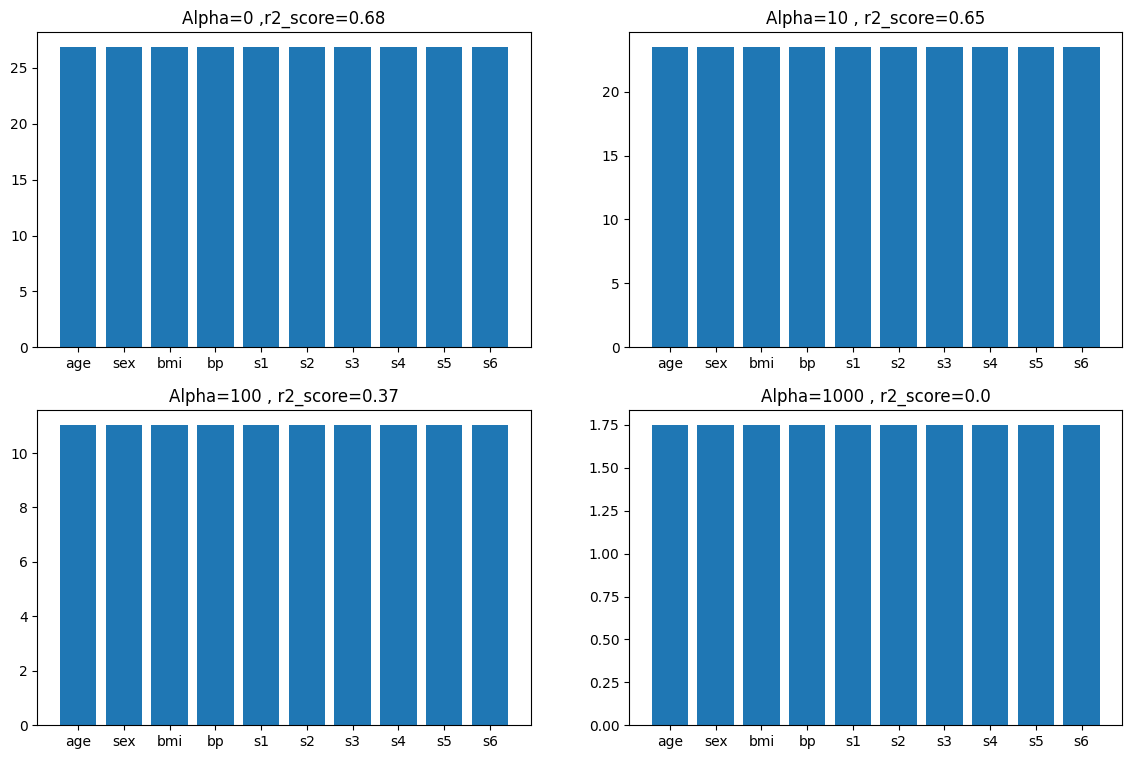

In [36]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha=0 ,r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha=10 , r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha=100 , r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha=1000 , r2_score={}'.format(round(r2_scores[3],2)))


plt.show()   # See the Y-axis 

Point 2. Higher Cofficents are affected more 

In [37]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,Y_train)
    
    coefs.append(reg.coef_.tolist())

In [38]:
input_array = np.array(coefs).T
input_array

array([[26.84461765, 26.8445791 , 26.84423216, 26.84076324, 26.80612333,
        26.46457909, 23.47372657, 11.01983476,  1.74766547,  0.18564393]])

In [39]:
#coef_df = pd.DataFrame(input_array,columns=data.feature_names)
#coef_df['alpha'] = alphas
#coef_df.set_index('alpha')

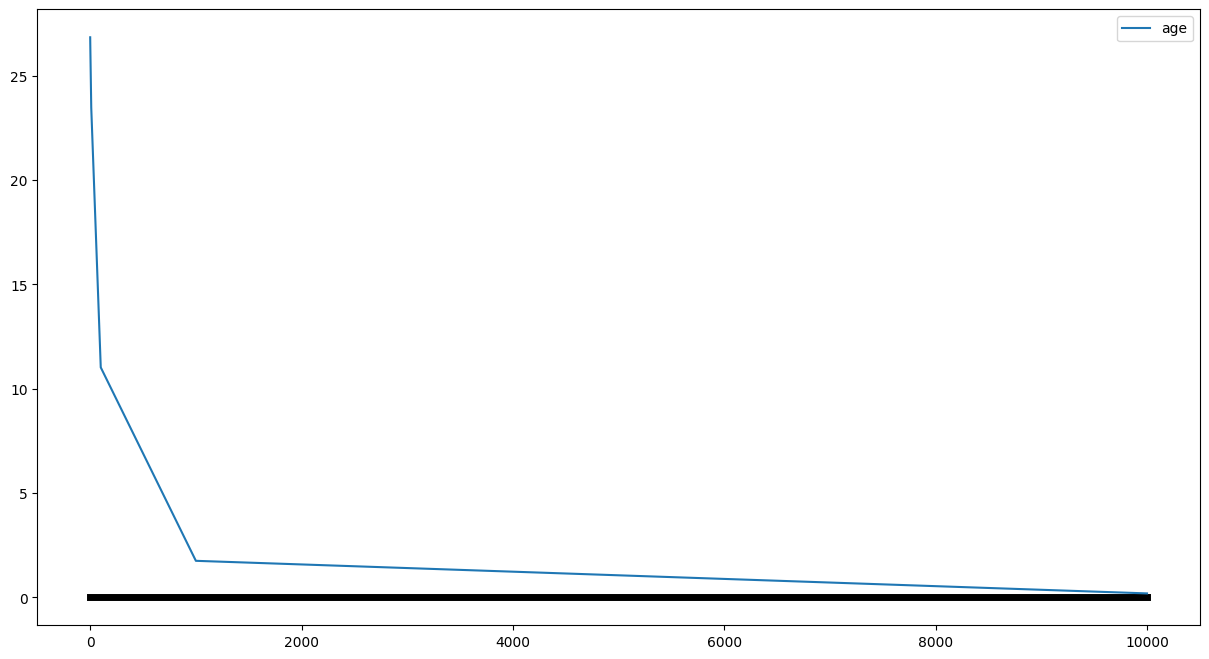

In [40]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

POINT 3. : Bias and Varianc -TradeOFF

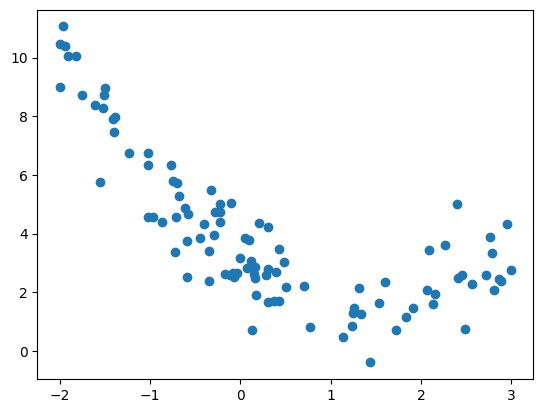

In [41]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [43]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [47]:
from mlxtend.evaluate import bias_variance_decomp

In [48]:


alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

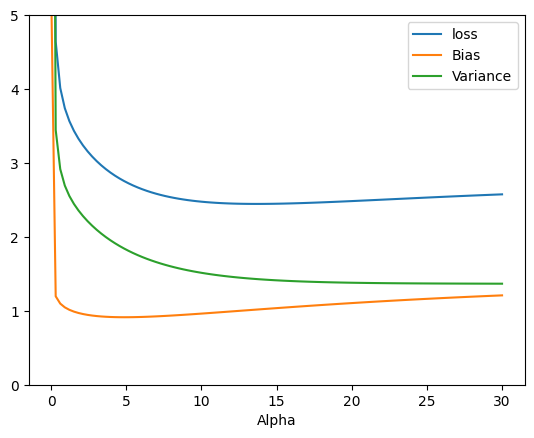

In [49]:

plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

POINT 4. : Impact on Loss Function

[27.82809103]
-2.29474455867698


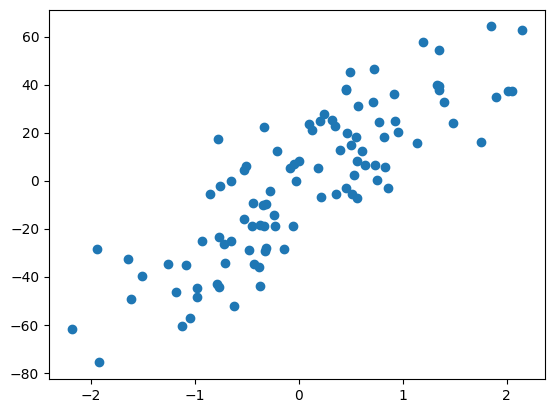

In [50]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [51]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [52]:
def predict(m):
    return m*X - 2.29

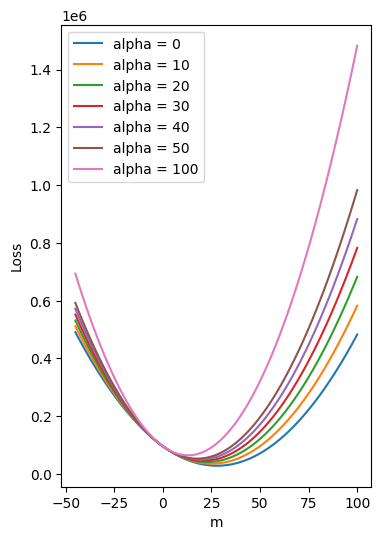

In [54]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()